In [1]:
import numpy
import matplotlib
import seaborn
import pandas as pd


#  Data Cleaning

In [2]:
# Syntax to read CSV file in Kaggle notebook
df = pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv')


In [3]:
df


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [4]:
# 

df.drop(columns=["UDI","Product ID"], inplace=True)


In [5]:
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 8 columns]

# Data Exploration/ Visualization

In [6]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [7]:
df["Process temperature [K]"].value_counts()

Process temperature [K]
310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: count, Length: 82, dtype: int64

In [8]:

# Set correlation generator with ignoring non-numerical data 
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
correlation_matrix = numeric_df.corr()


# Generate the ceoficient correlation 
correlation_matrix = df.corr(numeric_only=True)



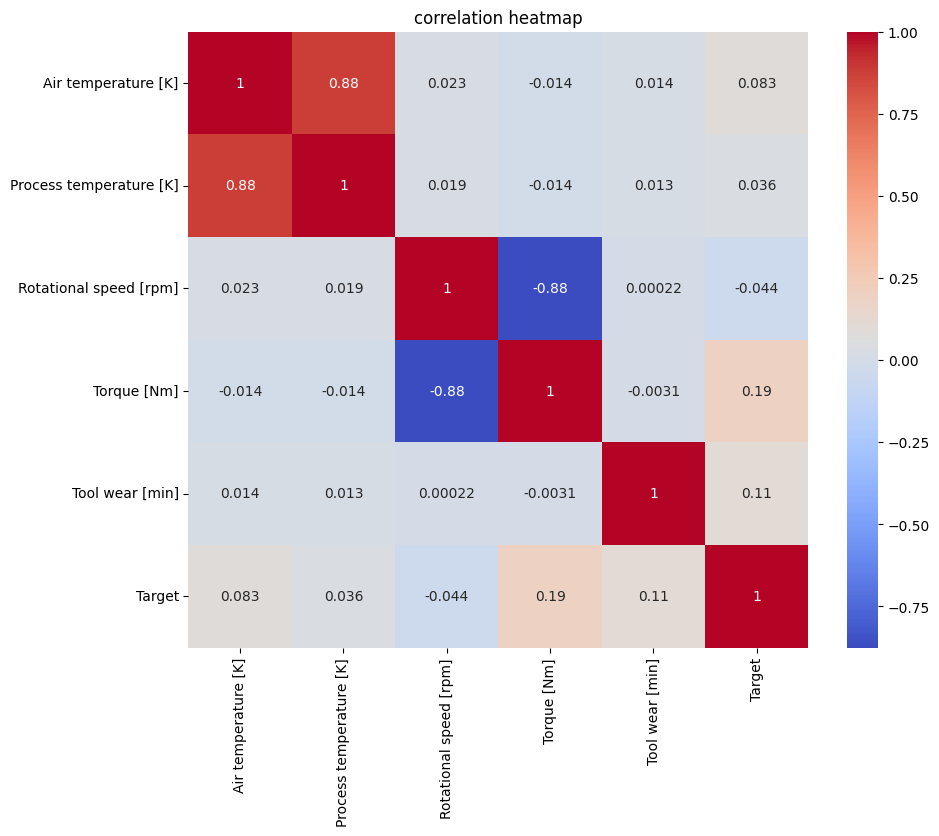

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True  )
plt.title('correlation heatmap')
plt.show()

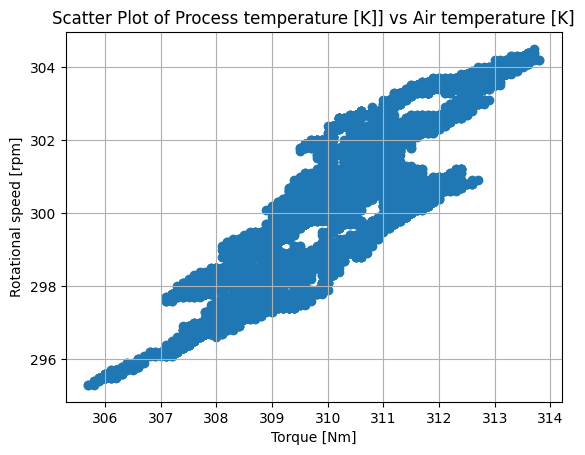

In [10]:
import matplotlib.pyplot as plt

# To form a clear idea on the positive correlaction between both attributes
plt.scatter(df['Process temperature [K]'], df['Air temperature [K]'])

plt.title('Scatter Plot of Process temperature [K]] vs Air temperature [K]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.grid(True)  # Show grid
plt.show()



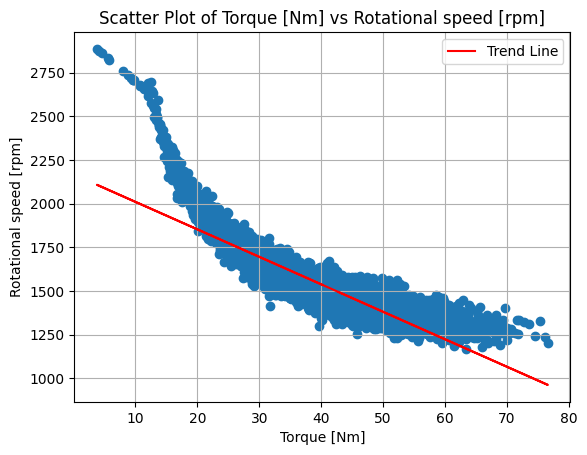

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot of Torque [Nm] vs Rotational speed [rpm]
plt.scatter(df['Torque [Nm]'], df['Rotational speed [rpm]'])

# Fit linear regression line
X = df['Torque [Nm]'].values.reshape(-1, 1)
y = df['Rotational speed [rpm]'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# Plot linear regression line
plt.plot(X, reg.predict(X), color='red', linestyle='-', label='Trend Line')

plt.title('Scatter Plot of Torque [Nm] vs Rotational speed [rpm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.grid(True)  # Show grid
plt.legend()  # Show legend
plt.show()


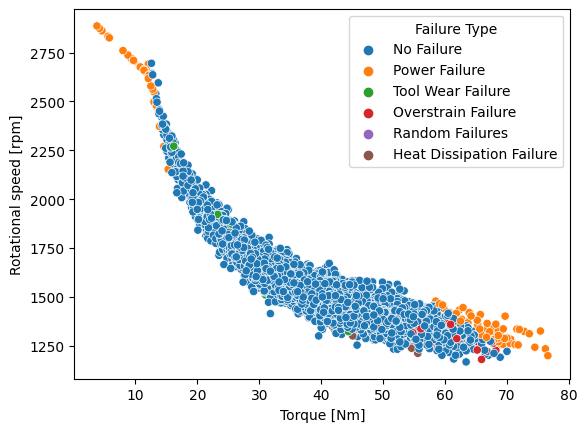

In [12]:
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="tab10");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

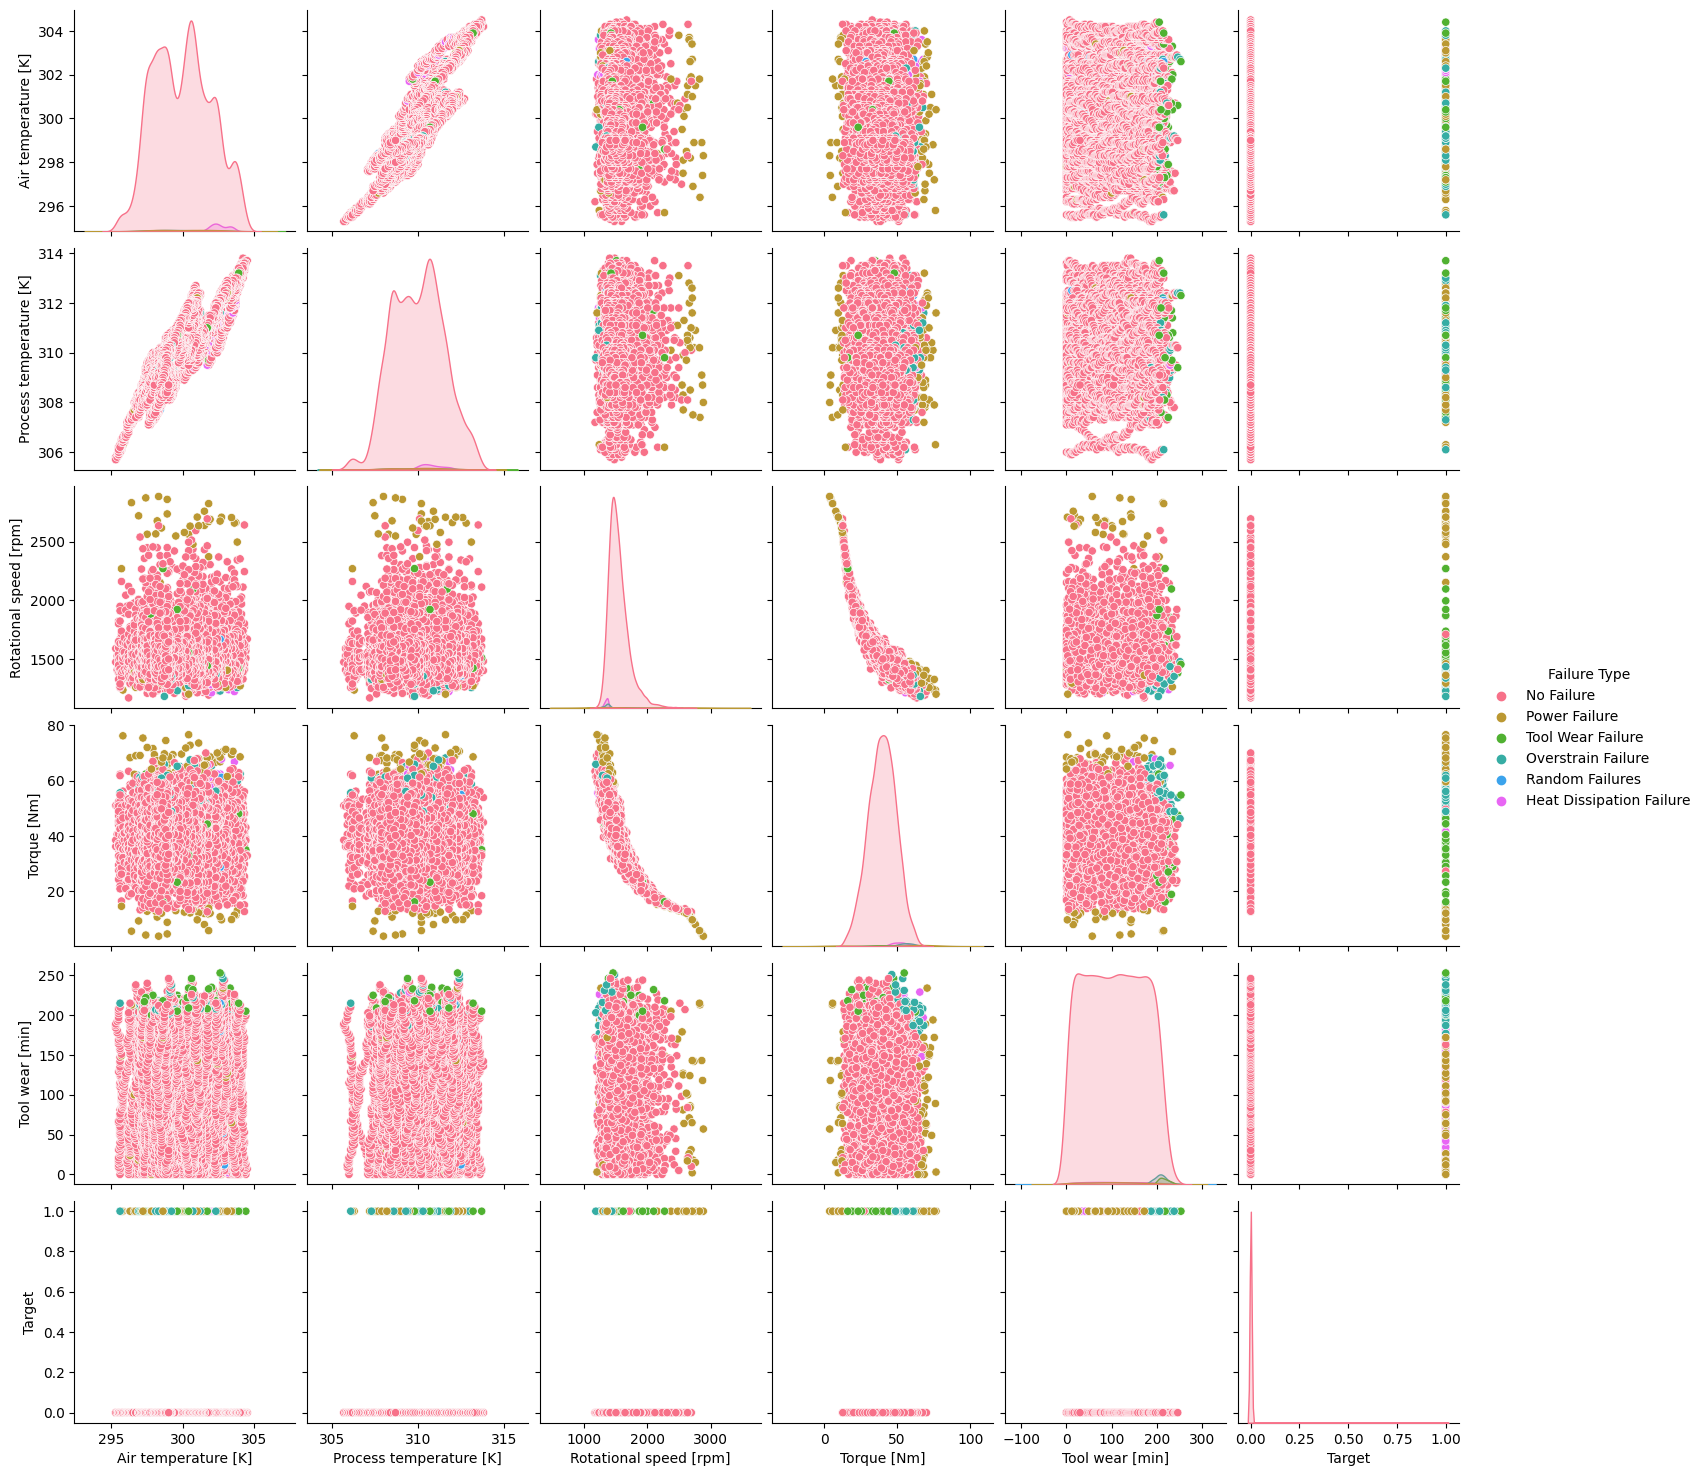

In [13]:


sns.pairplot(df, hue="Failure Type", palette="husl")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

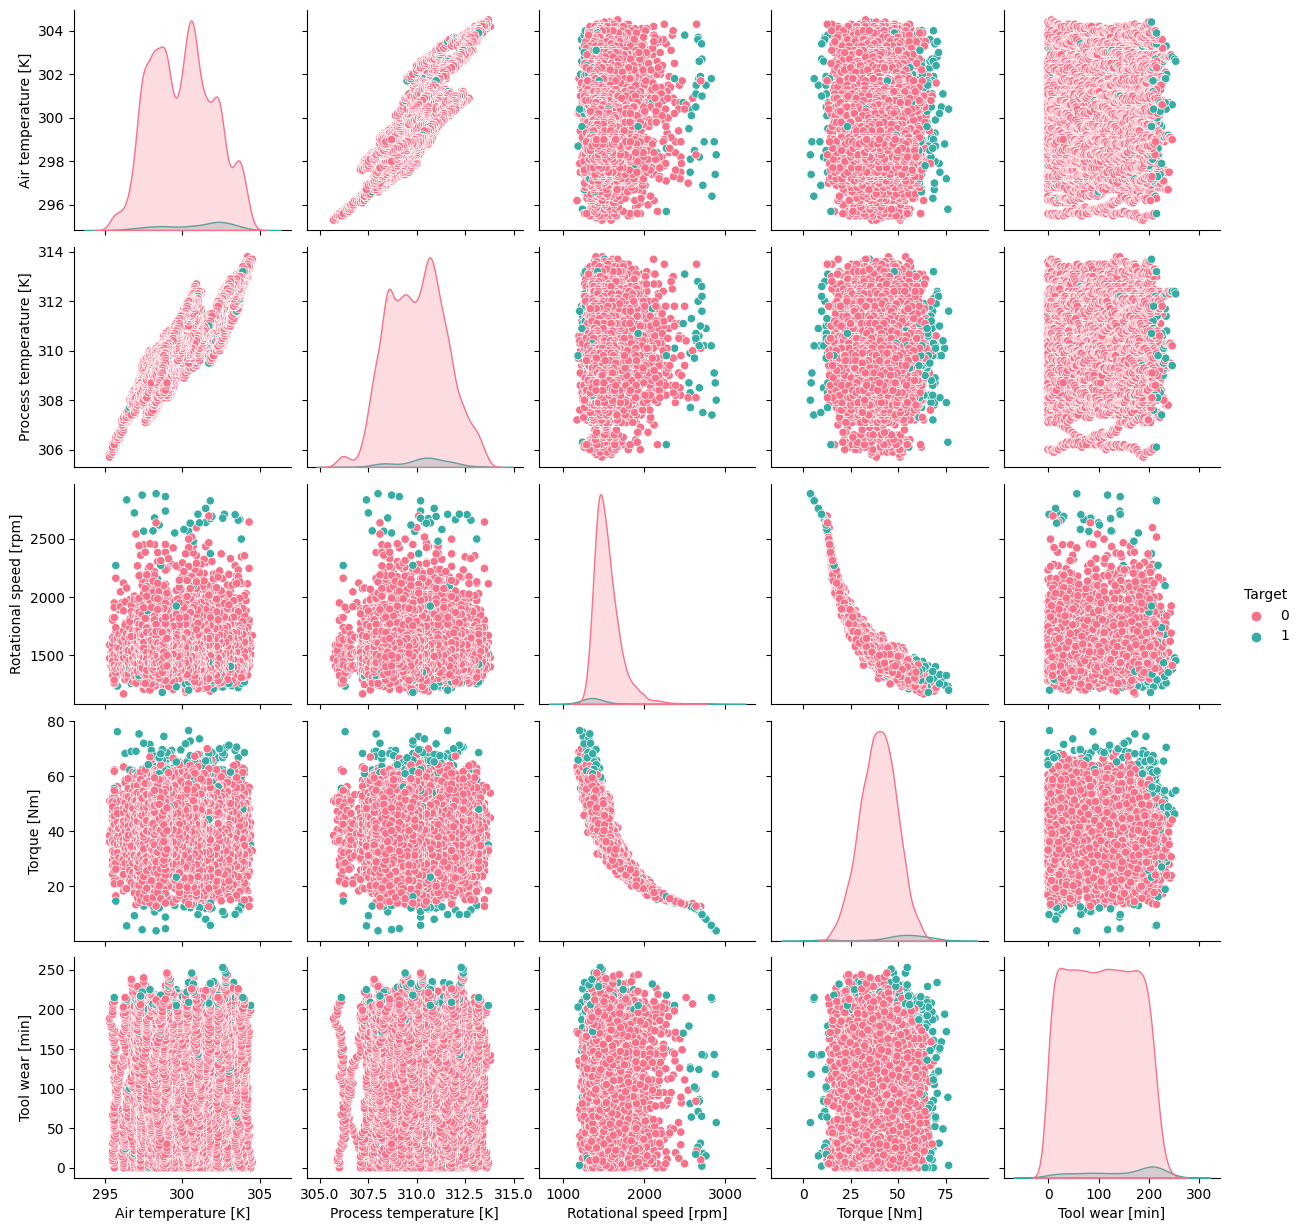

In [14]:
sns.pairplot(df,hue="Target",palette="husl")

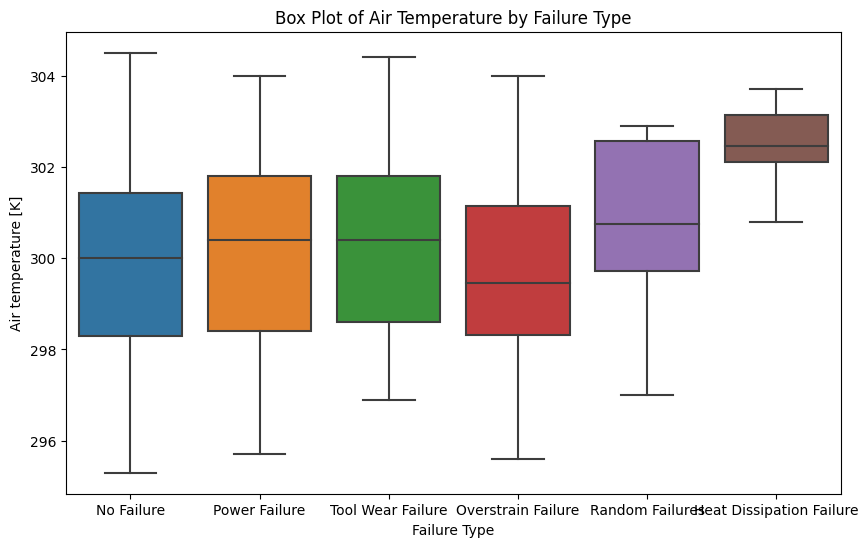

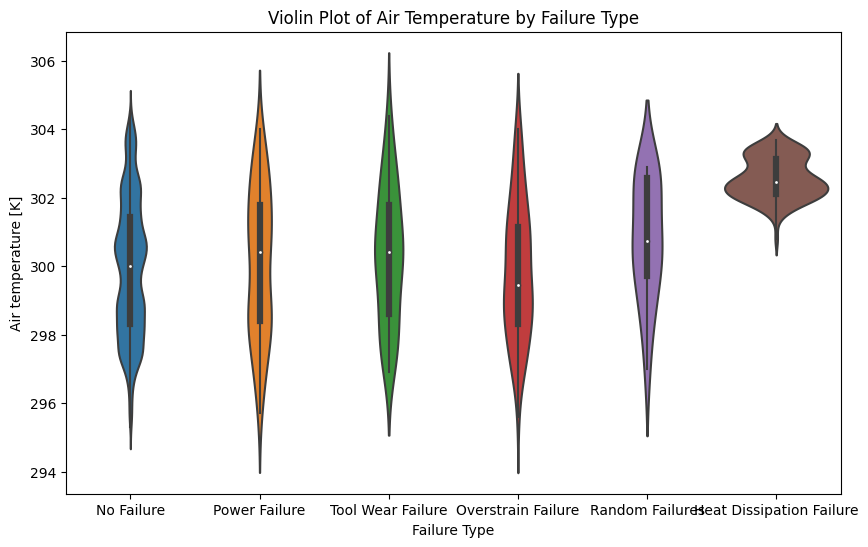

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Failure Type', y='Air temperature [K]')
plt.title('Box Plot of Air Temperature by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Air temperature [K]')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Failure Type', y='Air temperature [K]')
plt.title('Violin Plot of Air Temperature by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Air temperature [K]')
plt.show()


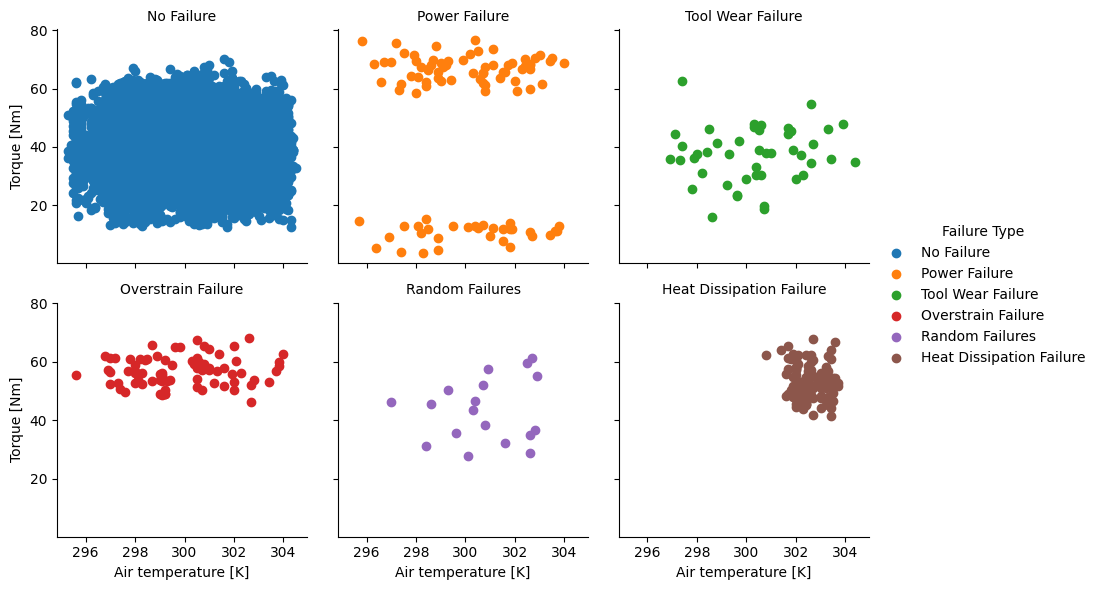

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with seaborn
g = sns.FacetGrid(df, col="Failure Type", hue="Failure Type", col_wrap=3)
# Map a scatter plot to each facet
g.map(plt.scatter, "Air temperature [K]", "Torque [Nm]")
# Add a title to each facet
g.set_titles(col_template="{col_name}")
# Add legend
g.add_legend()
# Show the plot
plt.show()


In [17]:
print(df['Failure Type'].unique())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


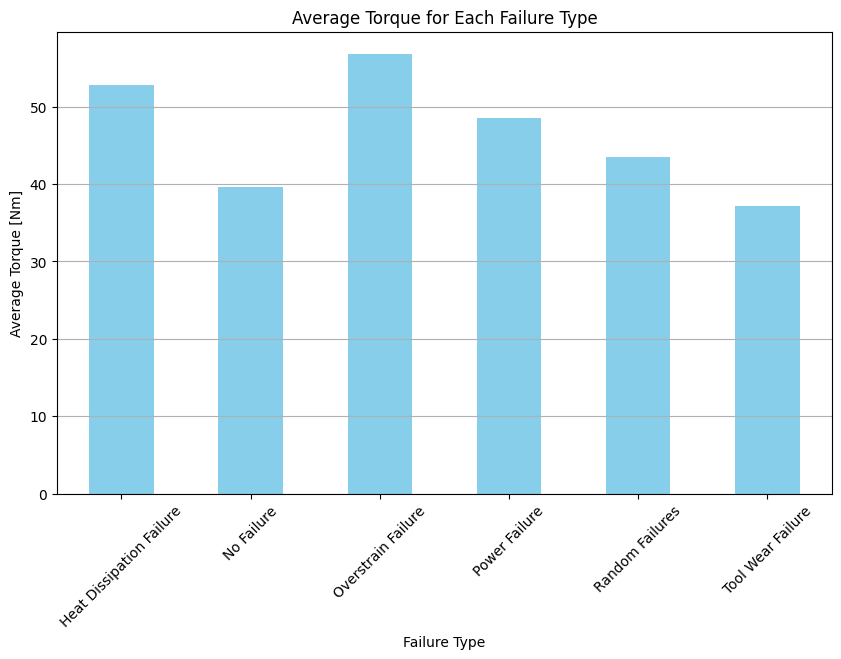

In [18]:

# Calculate the average value for each unique failure type
average_values = df.groupby('Failure Type')['Torque [Nm]'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_values.plot(kind='bar', color='skyblue')
plt.title('Average Torque for Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Average Torque [Nm]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


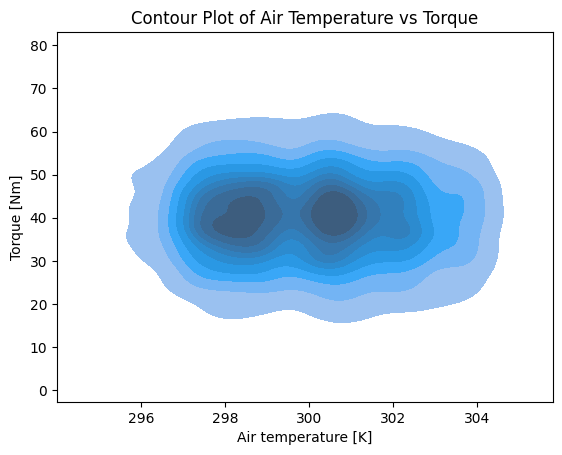

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contour plot
sns.kdeplot(x="Air temperature [K]", y="Torque [Nm]", data=df, fill=True)
plt.title('Contour Plot of Air Temperature vs Torque')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


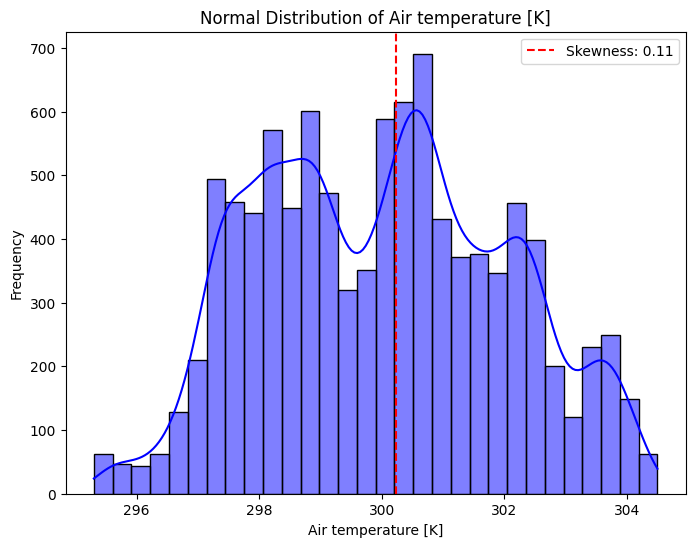

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


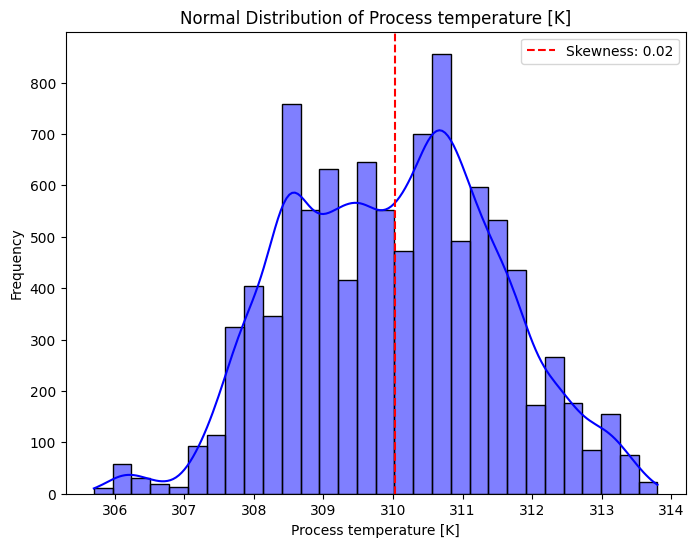

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


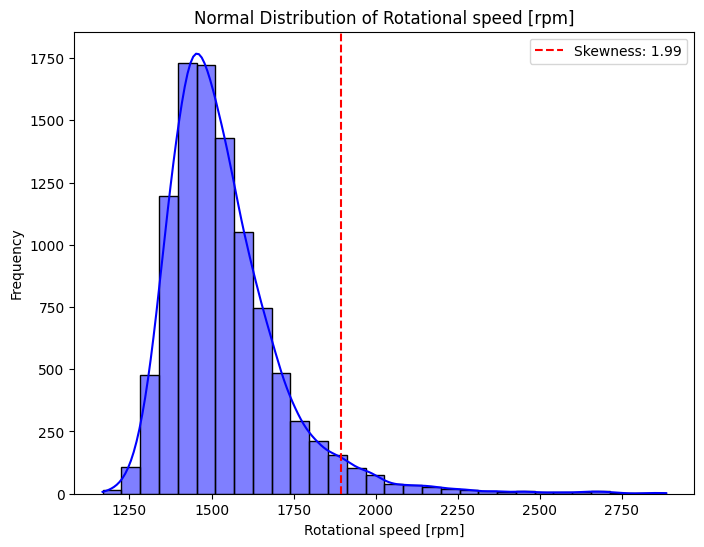

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


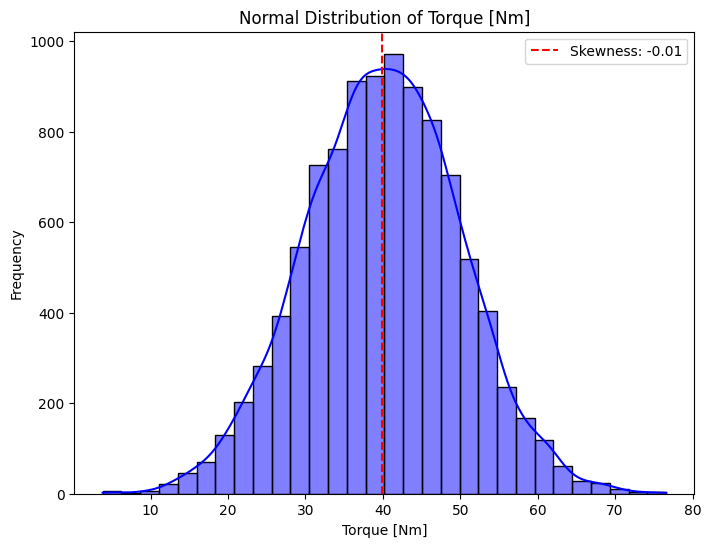

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


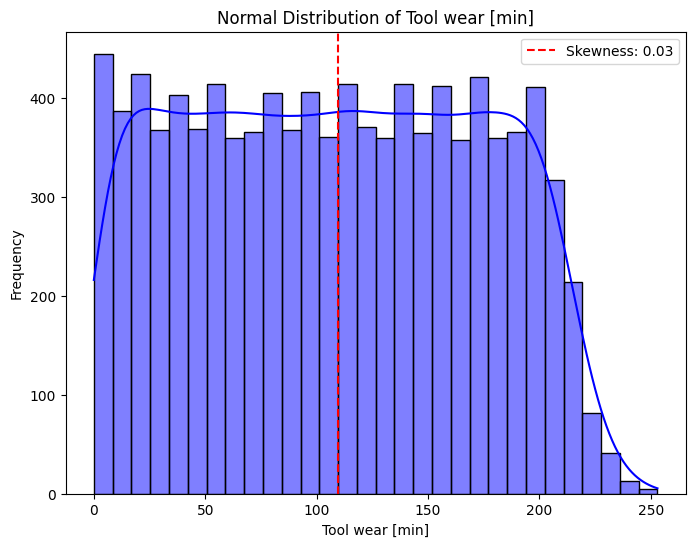

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Extract continuous features
continuous_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Generate normal distribution plots for each continuous feature
for feature in continuous_features:
    # Generate synthetic data for the feature (replace df[feature] with your actual data)
    data = df[feature]
    
    # Calculate skewness
    data_skewness = skew(data)
    
    # Create figure and axes
    plt.figure(figsize=(8, 6))
    
    # Plot histogram with kernel density estimation
    sns.histplot(data, kde=True, color='blue', bins=30)
    
    # Add vertical line to indicate skewness
    plt.axvline(x=data.mean() + data_skewness * data.std(), color='red', linestyle='--', label=f'Skewness: {data_skewness:.2f}')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Normal Distribution of {feature}')
    plt.legend()
    
    # Show plot
    plt.show()


In [21]:
print(df.columns)


Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
df['Failure Type_encoded'] = label_encoder.fit_transform(df['Failure Type'])


In [23]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])


In [24]:
# Remove the original categorical column 'Failure Type'
df.drop(columns=['Type'], inplace=True)


In [25]:
df

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Target Failure Type  Failure Type_encoded  \
0            42.8                0       0   No Failure                     1   
1            46.3                3       0   No Failure                     1   
2            49.4                5       0   No Failure                     1   
3            39.5                7       0   No Failure                     1   
4            40.0                9       0   No Failure                     1   
...           ...              ...     ...          ...                   ...   
9995         29.5               14       0   No Failure                     1   
9996         31.8               17       0   No Failure                     1   
9997         33.4               22       0   No Failure                     1   
9998         48.5               25       0   No Failure                     1   
9999         40.2               30       0   No Failure                     1   

      Type_encoded  
0                2  
1                1  
2                1  
3                1  
4                1  
...            ...  
9995             2  
9996             0  
9997             2  
9998             0  
9999             2  

[10000 rows x 9 columns]

In [26]:
df.drop(columns=["Failure Type"],inplace=True)


# Experiment 1 model set up & evaluation (Random Forest)


In [27]:
# Cell 1: Import libraries and define functions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, log_loss, precision_recall_curve, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def train_and_evaluate_classifier(df, features, target_column, classifiers):
    # Features (X)
    X = df[features]

    # Target labels (y)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dictionary to store evaluation metrics for each classifier
    results = {}

    for classifier_name, (clf, param_grid) in classifiers.items():
        print(f"Evaluating {classifier_name} classifier for {target_column} label...")

        # Perform Grid Search
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best parameters
        best_params = grid_search.best_params_
        print(f"Best parameters for {classifier_name}:", best_params)

        # Train the classifier on the training data with the best parameters
        clf.set_params(**best_params)
        clf.fit(X_train, y_train)

        # Evaluate the classifier's performance on the testing data
        test_accuracy = clf.score(X_test, y_test)
        print(f"Accuracy for {target_column} label using {classifier_name} classifier (Test Accuracy):", test_accuracy)

        # Compute confusion matrix
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

        # Compute log loss
        y_pred_proba = clf.predict_proba(X_test)
        loss = log_loss(y_test, y_pred_proba)
        print(f"Log Loss for {target_column} label using {classifier_name} classifier:", loss)

        # Compute precision-recall curve and F1 score for each class
        if len(clf.classes_) == 2:
            precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
            f1 = f1_score(y_test, y_pred)
            plot_precision_recall_curve(precision, recall)
            print(f"F1 Score for {target_column} label using {classifier_name} classifier:", f1)

               # Extract feature importances if applicable
        if hasattr(clf, 'feature_importances_'):
            feature_importances = clf.feature_importances_

            # Create a DataFrame to store feature importances
            importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

            # Sort the DataFrame by importance in descending order
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            # Plot feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=importance_df)
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.title(f'Feature Importance for {target_column} label using {classifier_name}')
            plt.show()

        # For Logistic Regression, you can't directly access feature_importances_, 
        # instead, you can look at the absolute coefficients of the model
        elif hasattr(clf, 'coef_'):
            coefficients = np.abs(clf.coef_[0])
            importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
            importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=importance_df)
            plt.xlabel('Coefficient Absolute Value')
            plt.ylabel('Feature')
            plt.title(f'Feature Importance for {target_column} label using {classifier_name}')
            plt.show()


        # Store results in the dictionary
        results[classifier_name] = {'test_accuracy': test_accuracy, 'loss': loss}

        # Print a blank line for visual separation between classifier results
        print()

    return results  # Return the results dictionary

In [28]:
# Cell 2: Define plot_precision_recall_curve function

def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='o', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

Evaluating RandomForest classifier for Failure Type_encoded label...
Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Failure Type_encoded label using RandomForest classifier (Test Accuracy): 0.981


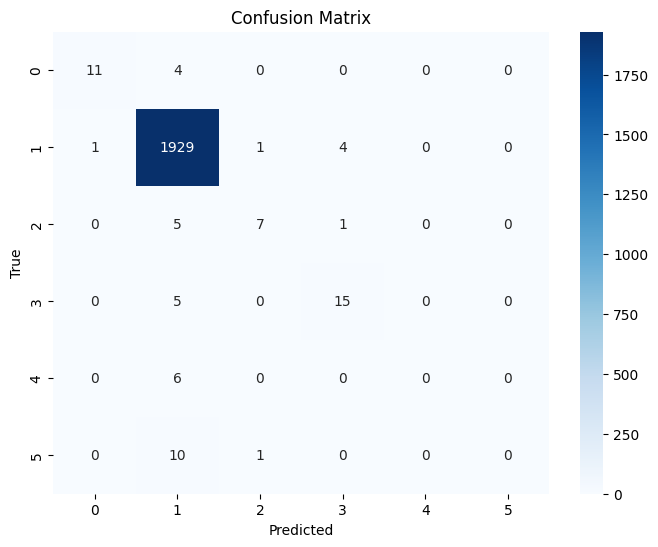

Log Loss for Failure Type_encoded label using RandomForest classifier: 0.16035691247546882


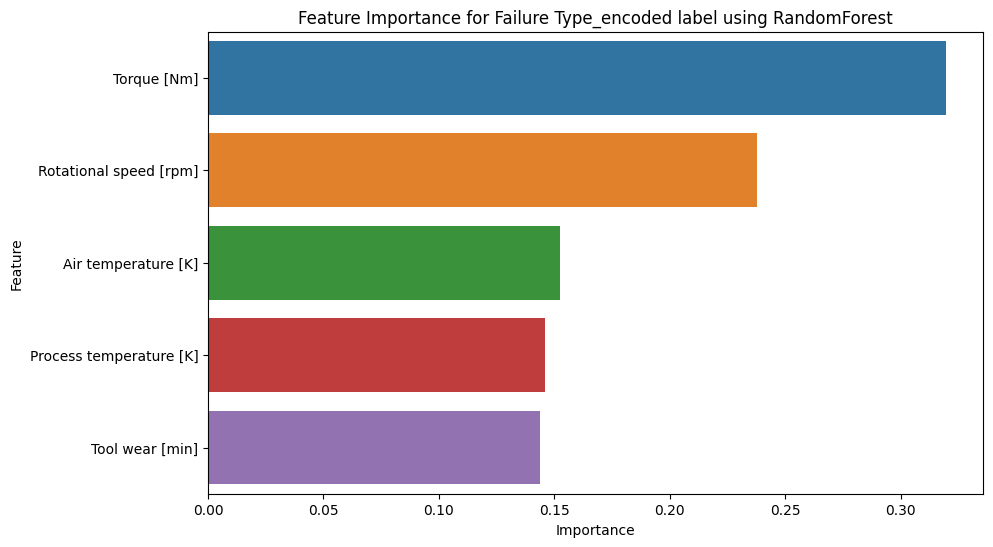


Evaluating RandomForest classifier for Target label...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for Target label using RandomForest classifier (Test Accuracy): 0.9845


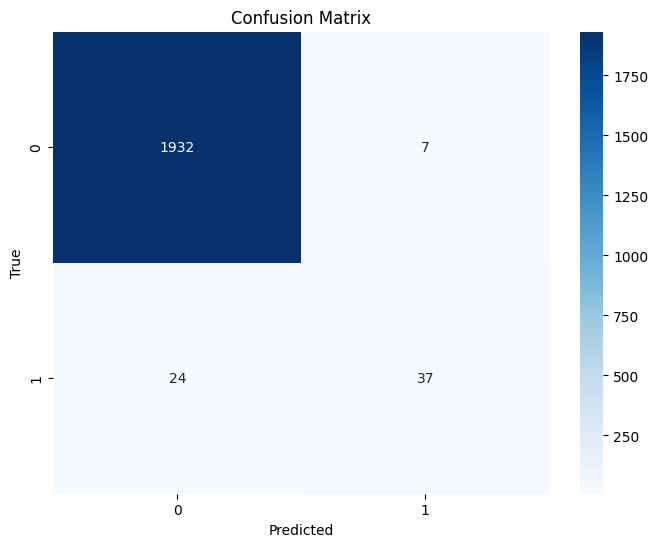

Log Loss for Target label using RandomForest classifier: 0.07983148907236227


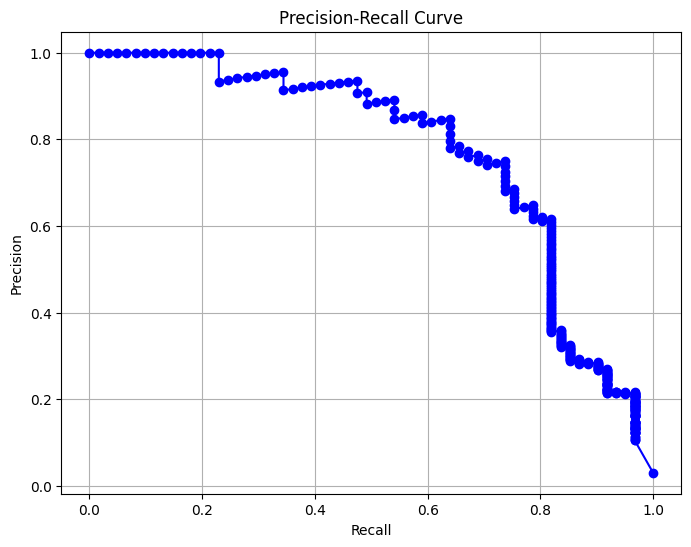

F1 Score for Target label using RandomForest classifier: 0.7047619047619049


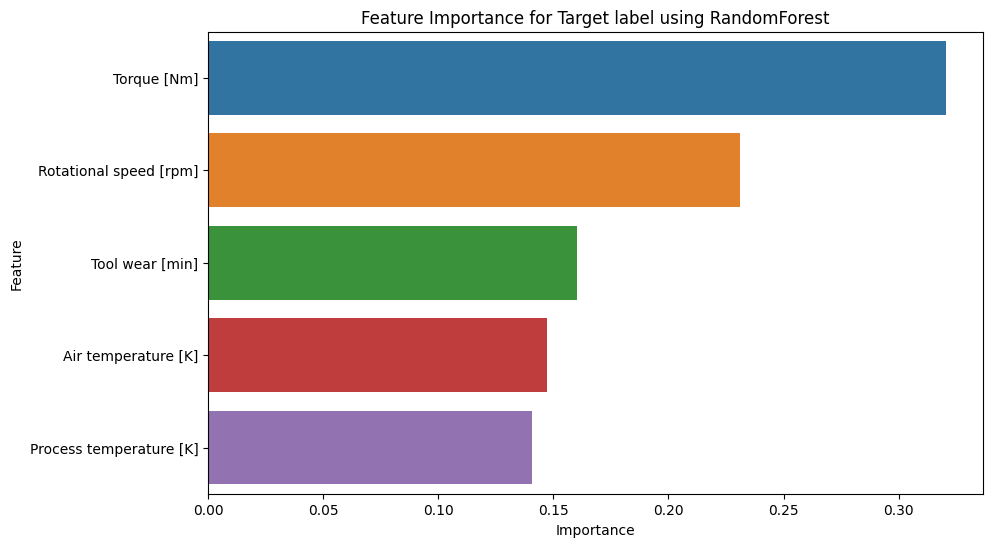

In [29]:
# Cell 4: Call the train_and_evaluate_classifier function for Random Forest

classifiers_randomforest = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

# Call the function for Random Forest with Failure Type label and store the results in a variable
result_RandomForest_failure_type = train_and_evaluate_classifier(df, features=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], target_column='Failure Type_encoded', classifiers=classifiers_randomforest)

# Call the function for Random Forest with Target label and store the results in a variable
result_RandomForest_target = train_and_evaluate_classifier(df, features=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], target_column='Target', classifiers=classifiers_randomforest)


# Experiment 2 model set up & evaluation (KNeighbor)


Evaluating KNN classifier for Target label...
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy for Target label using KNN classifier (Test Accuracy): 0.972


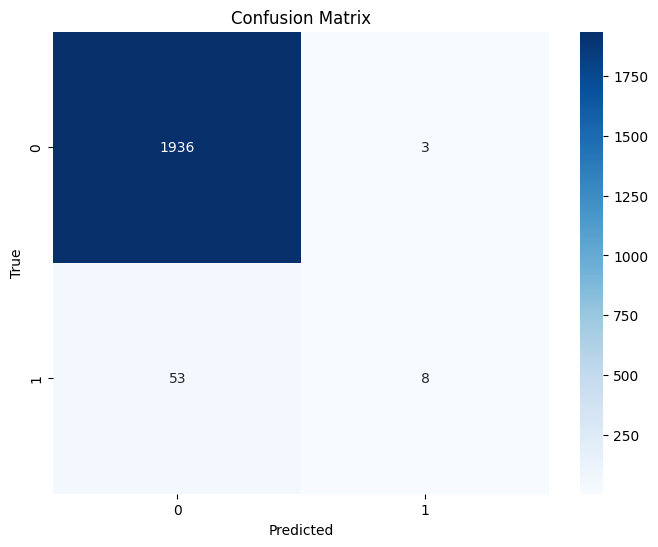

Log Loss for Target label using KNN classifier: 0.44503334895781593


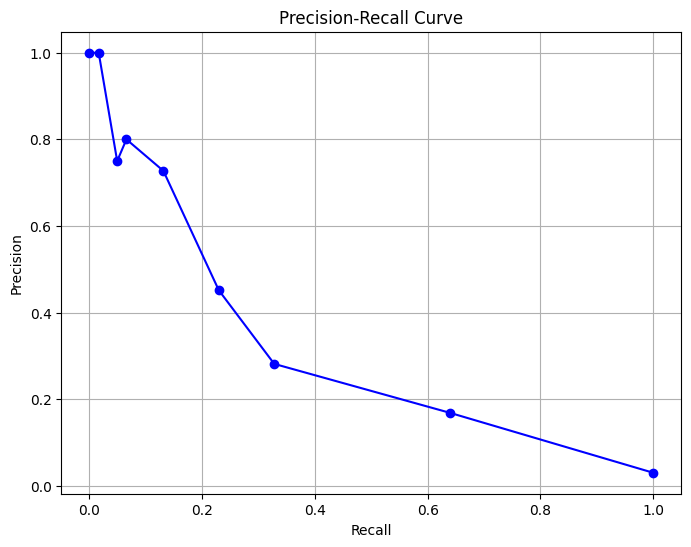

F1 Score for Target label using KNN classifier: 0.22222222222222224



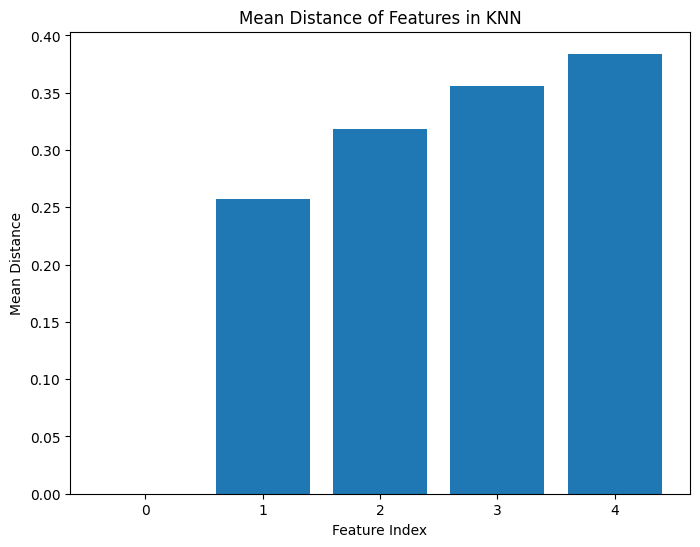

Evaluating KNN classifier for Failure Type_encoded label...
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy for Failure Type_encoded label using KNN classifier (Test Accuracy): 0.9695


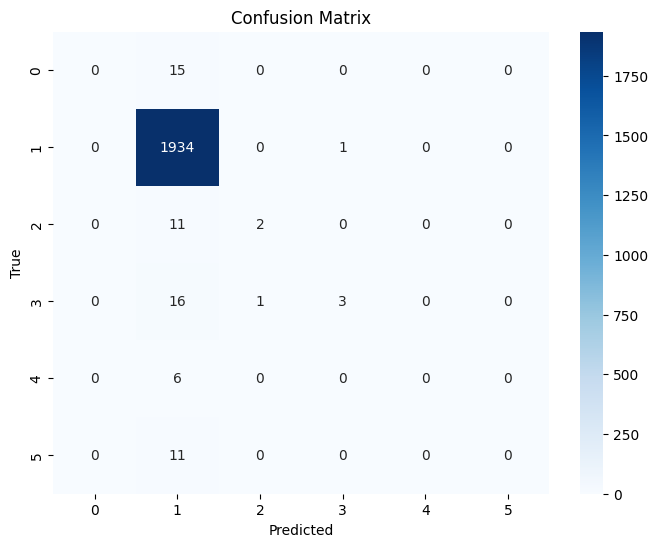

Log Loss for Failure Type_encoded label using KNN classifier: 0.6410515003498201



In [30]:
from sklearn.preprocessing import StandardScaler

# Define classifiers for KNN
classifiers_knn = {
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    })
}

# Call the function for KNN and store the results in a variable for the target label
result_KNN_target = train_and_evaluate_classifier(df, 
                                                  features=['Air temperature [K]', 'Process temperature [K]', 
                                                            'Rotational speed [rpm]', 'Torque [Nm]', 
                                                            'Tool wear [min]'], 
                                                  target_column='Target', 
                                                  classifiers=classifiers_knn)

# Add feature importance analysis for KNN

# Define the features used by KNN
knn_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[knn_features])

# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
knn_classifier.fit(X_scaled, df['Target'])  # Assuming 'Target' is the target column you want to predict

# Retrieve the distances and indices of the k-neighbors
distances, indices = knn_classifier.kneighbors(X_scaled)

# Now, you can analyze the distances to understand which features contribute more or less to the classification
# For example, you can calculate the mean distance for each feature
mean_distances = np.mean(distances, axis=0)

# You can then visualize the mean distances to gain insight into feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(len(mean_distances)), mean_distances)
plt.xlabel('Feature Index')
plt.ylabel('Mean Distance')
plt.title('Mean Distance of Features in KNN')
plt.show()

# Call the function for KNN with Failure Type label and store the results in a variable
result_KNN_failure_type = train_and_evaluate_classifier(df, 
                                                         features=['Air temperature [K]', 'Process temperature [K]', 
                                                                   'Rotational speed [rpm]', 'Torque [Nm]', 
                                                                   'Tool wear [min]'], 
                                                         target_column='Failure Type_encoded', 
                                                         classifiers=classifiers_knn)


# Experiment 3 model set up & evaluation (Logistic Regression)


Evaluating LogisticRegression classifier for Target label...
Best parameters for LogisticRegression: {'C': 0.01, 'penalty': 'l2'}
Accuracy for Target label using LogisticRegression classifier (Test Accuracy): 0.9745


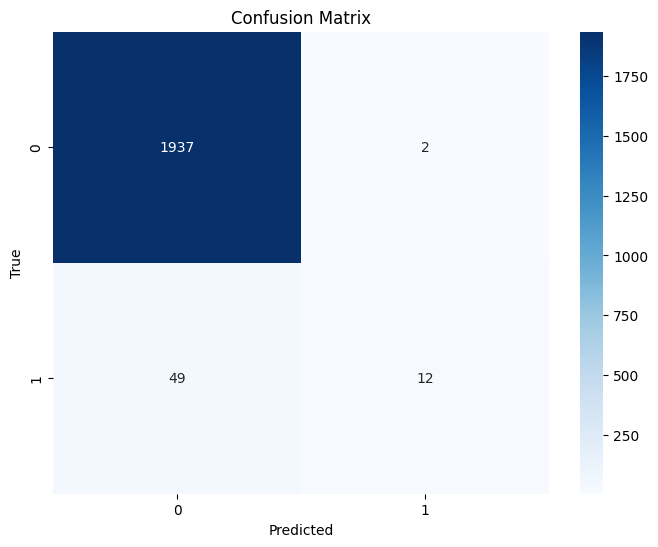

Log Loss for Target label using LogisticRegression classifier: 0.09420606140805997


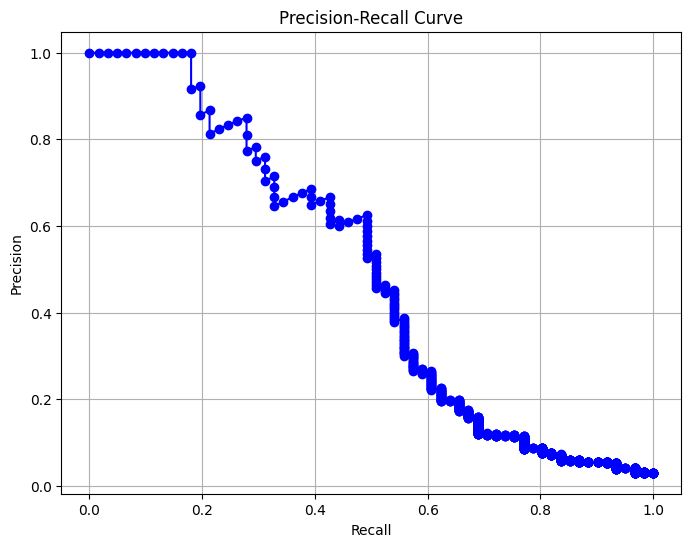

F1 Score for Target label using LogisticRegression classifier: 0.32000000000000006


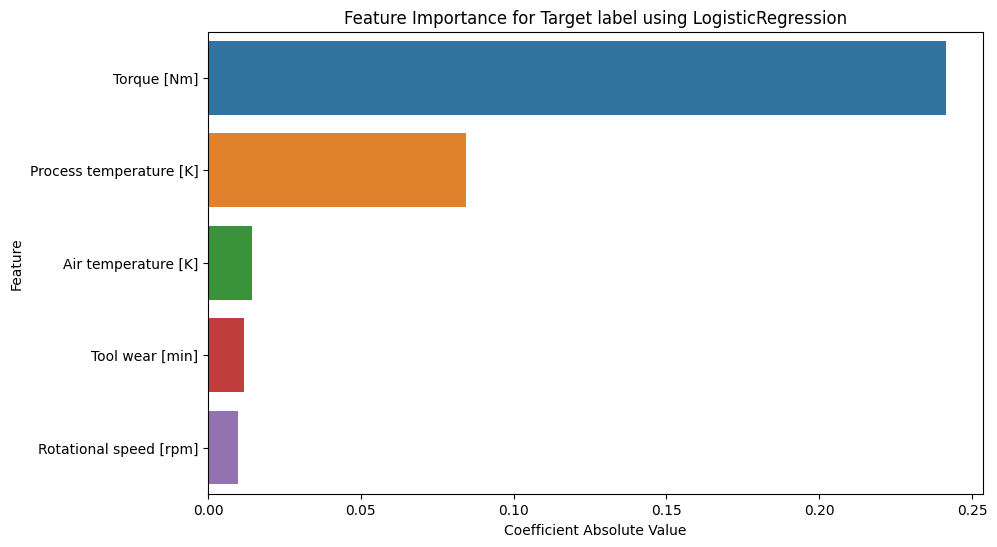


Evaluating LogisticRegression classifier for Failure Type_encoded label...
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l1'}
Accuracy for Failure Type_encoded label using LogisticRegression classifier (Test Accuracy): 0.9735


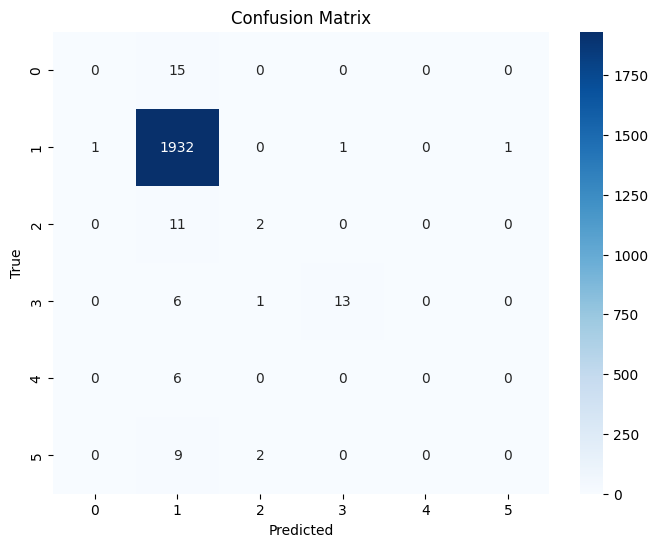

Log Loss for Failure Type_encoded label using LogisticRegression classifier: 0.10178059524896423


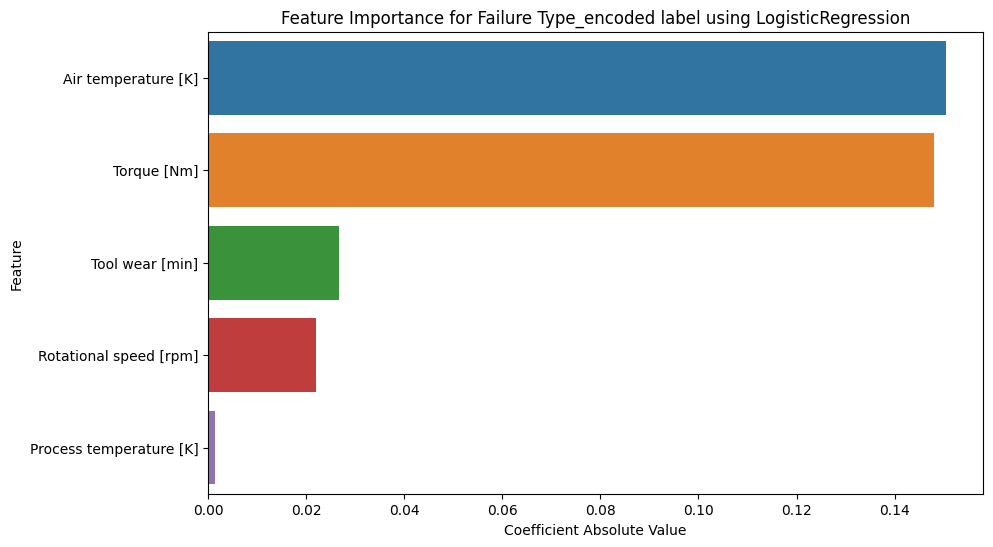

In [31]:
from sklearn.linear_model import LogisticRegression

# Define classifiers with updated solver and max_iter
classifiers_logreg = {
    'LogisticRegression': (LogisticRegression(max_iter=10000, solver='saga'), {  # Change the solver and increase max_iter
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    })
}

# Call the function for Logistic Regression and store the results in a variable
result_LogisticRegression_target = train_and_evaluate_classifier(df, 
                                                                 features=['Air temperature [K]', 'Process temperature [K]', 
                                                                           'Rotational speed [rpm]', 'Torque [Nm]', 
                                                                           'Tool wear [min]'], 
                                                                 target_column='Target', 
                                                                 classifiers=classifiers_logreg)

# Call the function for Logistic Regression with Failure Type label and store the results in a variable
result_LogisticRegression_failure_type = train_and_evaluate_classifier(df, 
                                                                        features=['Air temperature [K]', 'Process temperature [K]', 
                                                                                  'Rotational speed [rpm]', 'Torque [Nm]', 
                                                                                  'Tool wear [min]'], 
                                                                        target_column='Failure Type_encoded', 
                                                                        classifiers=classifiers_logreg)


# Model Comparison - Test Accuracies

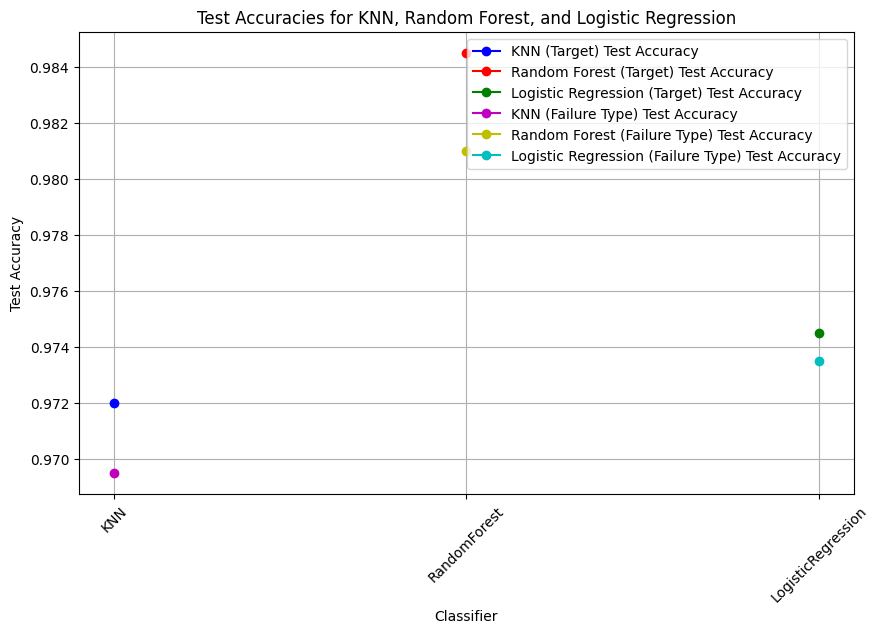

In [32]:
# Extract classifier names and corresponding metrics for Logistic Regression
classifiers_logreg_target = list(result_LogisticRegression_target.keys())
test_accuracies_logreg_target = [result_LogisticRegression_target[classifier]['test_accuracy'] for classifier in classifiers_logreg_target]
losses_logreg_target = [result_LogisticRegression_target[classifier]['loss'] for classifier in classifiers_logreg_target]

# Extract test accuracies for Random Forest classifier with target label
classifiers_rf_target = list(result_RandomForest_target.keys())
test_accuracies_rf_target = [result_RandomForest_target[classifier]['test_accuracy'] for classifier in classifiers_rf_target]

classifiers_logreg_failure_type = list(result_LogisticRegression_failure_type.keys())
test_accuracies_logreg_failure_type = [result_LogisticRegression_failure_type[classifier]['test_accuracy'] for classifier in classifiers_logreg_failure_type]
losses_logreg_failure_type = [result_LogisticRegression_failure_type[classifier]['loss'] for classifier in classifiers_logreg_failure_type]

# Extract test accuracies for Random Forest classifier with failure type label
classifiers_rf_failure_type = list(result_RandomForest_failure_type.keys())
test_accuracies_rf_failure_type = [result_RandomForest_failure_type[classifier]['test_accuracy'] for classifier in classifiers_rf_failure_type]

# Plot test accuracies as line chart for all classifiers
plt.figure(figsize=(10, 6))
plt.plot(list(result_KNN_target.keys()), [result_KNN_target[classifier]['test_accuracy'] for classifier in result_KNN_target], marker='o', color='b', label='KNN (Target) Test Accuracy')
plt.plot(classifiers_rf_target, test_accuracies_rf_target, marker='o', color='r', label='Random Forest (Target) Test Accuracy')
plt.plot(classifiers_logreg_target, test_accuracies_logreg_target, marker='o', color='g', label='Logistic Regression (Target) Test Accuracy')

plt.plot(list(result_KNN_failure_type.keys()), [result_KNN_failure_type[classifier]['test_accuracy'] for classifier in result_KNN_failure_type], marker='o', color='m', label='KNN (Failure Type) Test Accuracy')
plt.plot(classifiers_rf_failure_type, test_accuracies_rf_failure_type, marker='o', color='y', label='Random Forest (Failure Type) Test Accuracy')
plt.plot(classifiers_logreg_failure_type, test_accuracies_logreg_failure_type, marker='o', color='c', label='Logistic Regression (Failure Type) Test Accuracy')

plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for KNN, Random Forest, and Logistic Regression')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Model comparison - test accuracies & loss function


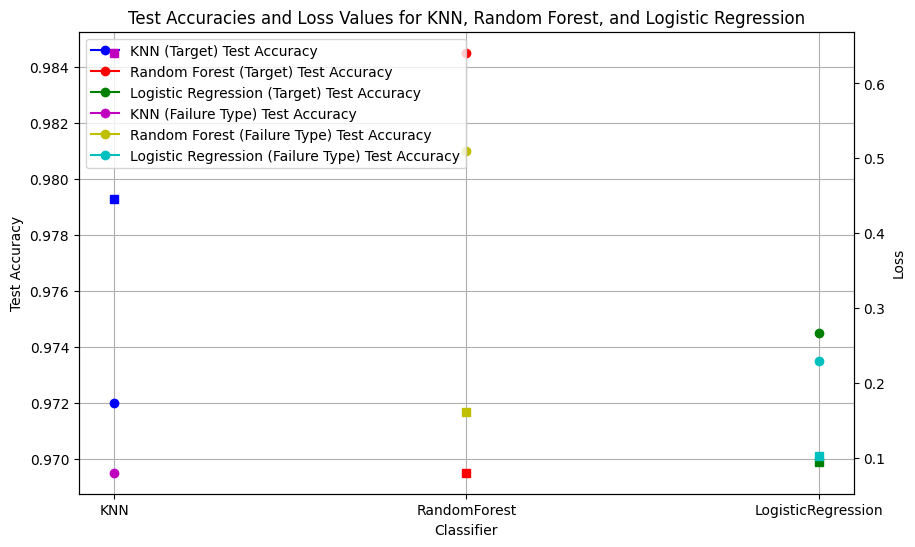

In [33]:
# Extract classifier names and corresponding metrics for Logistic Regression
classifiers_logreg_target = list(result_LogisticRegression_target.keys())
test_accuracies_logreg_target = [result_LogisticRegression_target[classifier]['test_accuracy'] for classifier in classifiers_logreg_target]
losses_logreg_target = [result_LogisticRegression_target[classifier]['loss'] for classifier in classifiers_logreg_target]

classifiers_logreg_failure_type = list(result_LogisticRegression_failure_type.keys())
test_accuracies_logreg_failure_type = [result_LogisticRegression_failure_type[classifier]['test_accuracy'] for classifier in classifiers_logreg_failure_type]
losses_logreg_failure_type = [result_LogisticRegression_failure_type[classifier]['loss'] for classifier in classifiers_logreg_failure_type]

# Extract classifier names and corresponding metrics for KNN with target label
classifiers_knn_target = list(result_KNN_target.keys())
test_accuracies_knn_target = [result_KNN_target[classifier]['test_accuracy'] for classifier in classifiers_knn_target]
losses_knn_target = [result_KNN_target[classifier]['loss'] for classifier in classifiers_knn_target]

# Extract classifier names and corresponding metrics for Random Forest with target label
classifiers_rf_target = list(result_RandomForest_target.keys())
test_accuracies_rf_target = [result_RandomForest_target[classifier]['test_accuracy'] for classifier in classifiers_rf_target]
losses_rf_target = [result_RandomForest_target[classifier]['loss'] for classifier in classifiers_rf_target]

# Extract classifier names and corresponding metrics for Logistic Regression with target label
classifiers_logreg_target = list(result_LogisticRegression_target.keys())
test_accuracies_logreg_target = [result_LogisticRegression_target[classifier]['test_accuracy'] for classifier in classifiers_logreg_target]
losses_logreg_target = [result_LogisticRegression_target[classifier]['loss'] for classifier in classifiers_logreg_target]

# Extract classifier names and corresponding metrics for KNN with failure type label
classifiers_knn_failure_type = list(result_KNN_failure_type.keys())
test_accuracies_knn_failure_type = [result_KNN_failure_type[classifier]['test_accuracy'] for classifier in classifiers_knn_failure_type]
losses_knn_failure_type = [result_KNN_failure_type[classifier]['loss'] for classifier in classifiers_knn_failure_type]

# Extract classifier names and corresponding metrics for Random Forest with failure type label
classifiers_rf_failure_type = list(result_RandomForest_failure_type.keys())
test_accuracies_rf_failure_type = [result_RandomForest_failure_type[classifier]['test_accuracy'] for classifier in classifiers_rf_failure_type]
losses_rf_failure_type = [result_RandomForest_failure_type[classifier]['loss'] for classifier in classifiers_rf_failure_type]

# Extract classifier names and corresponding metrics for Logistic Regression with failure type label
classifiers_logreg_failure_type = list(result_LogisticRegression_failure_type.keys())
test_accuracies_logreg_failure_type = [result_LogisticRegression_failure_type[classifier]['test_accuracy'] for classifier in classifiers_logreg_failure_type]
losses_logreg_failure_type = [result_LogisticRegression_failure_type[classifier]['loss'] for classifier in classifiers_logreg_failure_type]


# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot test accuracies
ax1.plot(classifiers_knn_target, test_accuracies_knn_target, marker='o', color='b', label='KNN (Target) Test Accuracy')
ax1.plot(classifiers_rf_target, test_accuracies_rf_target, marker='o', color='r', label='Random Forest (Target) Test Accuracy')
ax1.plot(classifiers_logreg_target, test_accuracies_logreg_target, marker='o', color='g', label='Logistic Regression (Target) Test Accuracy')

ax1.plot(classifiers_knn_failure_type, test_accuracies_knn_failure_type, marker='o', color='m', label='KNN (Failure Type) Test Accuracy')
ax1.plot(classifiers_rf_failure_type, test_accuracies_rf_failure_type, marker='o', color='y', label='Random Forest (Failure Type) Test Accuracy')
ax1.plot(classifiers_logreg_failure_type, test_accuracies_logreg_failure_type, marker='o', color='c', label='Logistic Regression (Failure Type) Test Accuracy')

# Set labels and title for the plot
ax1.set_xlabel('Classifier')
ax1.set_ylabel('Test Accuracy', color='black')
ax1.set_title('Test Accuracies and Loss Values for KNN, Random Forest, and Logistic Regression')
ax1.legend(loc='upper left')

# Create a second y-axis for loss values
ax2 = ax1.twinx()
ax2.plot(classifiers_knn_target, losses_knn_target, marker='s', color='b', label='KNN (Target) Loss')
ax2.plot(classifiers_rf_target, losses_rf_target, marker='s', color='r', label='Random Forest (Target) Loss')
ax2.plot(classifiers_logreg_target, losses_logreg_target, marker='s', color='g', label='Logistic Regression (Target) Loss')

ax2.plot(classifiers_knn_failure_type, losses_knn_failure_type, marker='s', color='m', label='KNN (Failure Type) Loss')
ax2.plot(classifiers_rf_failure_type, losses_rf_failure_type, marker='s', color='y', label='Random Forest (Failure Type) Loss')
ax2.plot(classifiers_logreg_failure_type, losses_logreg_failure_type, marker='s', color='c', label='Logistic Regression (Failure Type) Loss')

# Set labels for the second y-axis
ax2.set_ylabel('Loss', color='black')

# Display grid lines
ax1.grid(True)

# Show the plot
plt.show()
